## Para este Notebbok:
- Precisa-se ter instalado:
    - Jupyter Notebook
    - Pandas
    - Matplotlib
    - Numpy
    - Seaborn
    - Plotly
    - IpyWidgets
    - NLTK
        - para o STOPWORDS
    - Counter
        - do Collections
---
Obs:
- Estou usando uma interação entre o IpyWidgets e o Plotly juntos neste notebook.

### Este conjunto de dados encontra-se no link abaixo:

https://www.kaggle.com/prasertk/michelinstar-restaurants

Contexto
- Explore o mundo dos restaurantes "estrelas" Micheline por estrela, cidade, país, culinária e chef.
---
Reconhecimentos
- Fonte de dados: https://guide.michelin.com/th/en/restaurants



- Por meio de uma investigação, o link acima, te direciona para um site, onde ele recomenda restaurantes 5 estrelas ao redor do mundo. 

---
- Então aqui começa minha exploração neste conjunto de dados.

# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
import nltk

from wordcloud import WordCloud
from nltk.corpus import stopwords 
from ipywidgets import fixed
from collections import Counter


sns.set_theme(style='darkgrid')

# Carregando os dados

In [2]:
dados = pd.read_csv('michelin_star.csv')

# Informações dos dados

In [4]:
dados.head()

,name,blurb,michelin_award,city,country,lat,lon,image,chef,cuisine1,cuisine2,url,url2
0,'L Chimpl,Haute cuisine has arrived at the “simple” Gran...,ONE_STAR,Tamion,Italy,46.407342,11.656432,https://axwwgrkdco.cloudimg.io/v7/mitp-p-001-d...,Stefano Ghetta,Creative,Contemporary,https://guide.michelin.com/en/trentino-alto-ad...,https://guide.michelin.com/en/trentino-alto-ad...
1,'t Amsterdammertje,"If you’re a fan of hip, vibrant and trendy",ONE_STAR,Loenen aan de Vecht,Netherlands,52.209859,5.021655,https://axwwgrkdco.cloudimg.io/v7/mitp-p-001-d...,André Gerrits,Creative,NaN,https://guide.michelin.com/en/utrecht/loenen-a...,https://guide.michelin.com/en/utrecht/loenen-a...
2,'t Fornuis,’t Fornuis is a restaurant that has become rare,ONE_STAR,Antwerpen,Belgium,51.219039,4.399448,https://axwwgrkdco.cloudimg.io/v7/mitp-p-001-d...,Johan Segers,Classic Cuisine,NaN,https://guide.michelin.com/en/antwerpen/be-ant...,https://guide.michelin.com/en/antwerpen/be-ant...
3,'t Korennaer,Edwin Van Goethem jazzes up his cooking with i...,ONE_STAR,Nieuwkerken-Waas,Belgium,51.192947,4.178107,https://axwwgrkdco.cloudimg.io/v7/mitp-p-001-d...,Edwin Van Goethem,Modern Cuisine,NaN,https://guide.michelin.com/en/oost-vlaanderen/...,https://guide.michelin.com/en/oost-vlaanderen/...
4,'t Lansink,Warmth and character are the hallmarks of ’t L...,ONE_STAR,Hengelo,Netherlands,52.259676,6.782365,https://axwwgrkdco.cloudimg.io/v7/mtp-cf-image...,Lars van Galen,Modern Cuisine,Modern French,https://guide.michelin.com/en/overijssel/henge...,https://guide.michelin.com/en/overijssel/henge...


- Criando uma tabela contendo as seguintes informações do conjunto de dados: valores únicos, valores nulos, porcentagem dos valores nulos no conjunto e os tipos de dados inseridos. 

In [3]:
# imprimindo o número de dados duplicados,linhas e colunas nos dados
print('Linhas: {}'.format(dados.shape[0]))
print('Colunas: {}'.format(dados.shape[1]))
print('Dados Duplicados: {}'.format(dados.duplicated().sum()))

tabela = pd.DataFrame({
    'ValUni':dados.nunique(),
    'ValNull': dados.isnull().sum(),
    'ValNullPercent':dados.isnull().sum() / len(dados),
    'ValTypes':dados.dtypes.values
})
tabela

Linhas: 3192
Colunas: 13
Dados Duplicados: 0


,ValUni,ValNull,ValNullPercent,ValTypes
name,3125,0,0.000000,object
blurb,3190,0,0.000000,object
michelin_award,3,0,0.000000,object
city,1467,0,0.000000,object
country,42,0,0.000000,object
lat,3184,0,0.000000,float64
lon,3183,0,0.000000,float64
image,3174,18,0.005639,object
chef,2761,387,0.121241,object
cuisine1,113,0,0.000000,object


# Transformando os dados

- Nomeando dados categóricos para númericos

In [7]:
# criando uma coluna vazia
dados['star'] = 'nan'

# fazendo um loop para a troca de valores categóricos para númericos
for i in range(len(dados)):
    if (dados.loc[i,'michelin_award'] == 'ONE_STAR'):
        dados.loc[i,'star'] = 1
        
    elif (dados.loc[i,'michelin_award'] == 'TWO_STARS'):
        dados.loc[i,'star'] = 2
        
    else:
        dados.loc[i,'star'] = 3

# alterando o tipo de dados      
dados['star'] = dados['star'].astype(int)

- Criando botões de opções com Widggets para a utilizar nas funções a seguir.

In [5]:
# escolhendo um país
paises = widgets.Dropdown(
          options = dados['country'].unique().tolist(),# selecionado no tipo único e em lista
          value = 'Italy',
          description= 'Estrela',
          disable = False,
           )

# escolhendo uma avaliação
estrela = widgets.Dropdown(
          options = dados['star'].unique().tolist(), 
          value = 1,
          description= 'Estrela',
          disable = False,
           )

In [3]:
# excluindo colunas que não seram úteis aqui
dados.drop(['cuisine2', 'image','url','url2'],axis=1, inplace=True)

# Visualização Gráfica

- Qual a avaliação mais comum?
- Quais são os países mais comum no site?
- Qual a cidade mais citada?
- Qual o país é mais adicionado?
- Qual o estilo de cozinha dos restaurantes?
- 

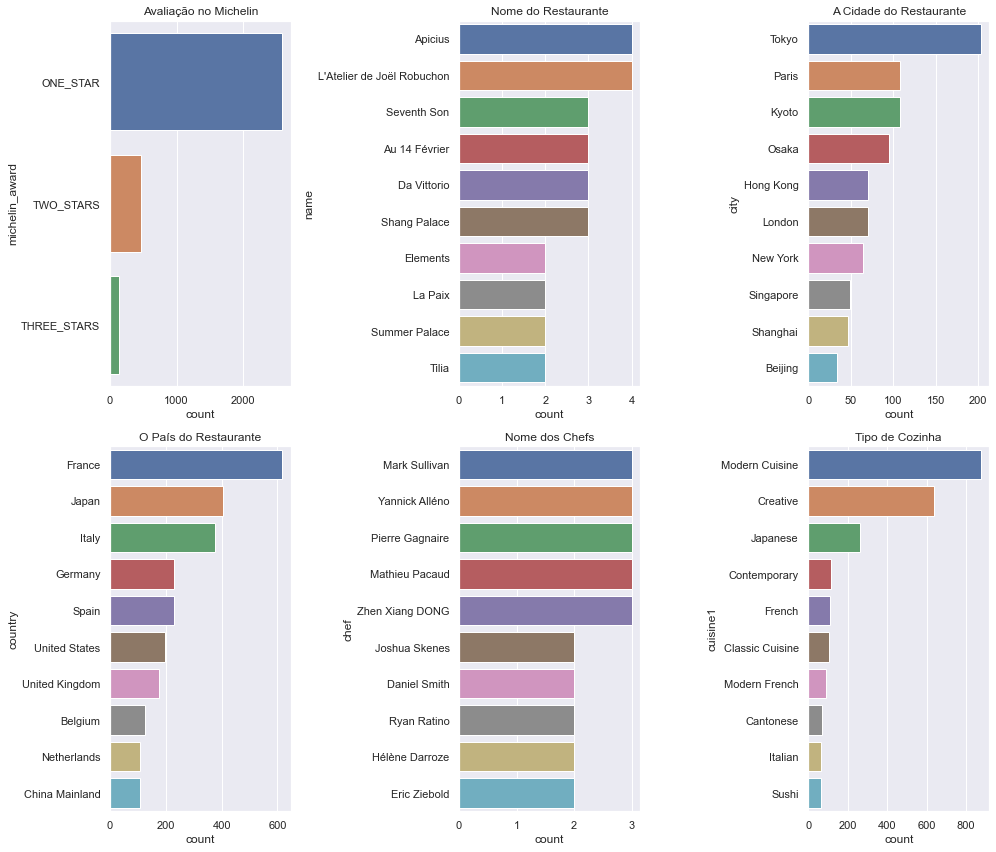

In [4]:
fig, axes = plt.subplots(2,3, figsize=(14,12))

# qual avaliação mais comum?
sns.countplot(y='michelin_award', data=dados, ax=axes[0][0])
axes[0][0].set_title('Avaliação no Michelin')

# quais são os restaurantes mais comum no site?
sns.countplot(y='name', data=dados, order=dados['name'].value_counts().index[0:10], ax=axes[0][1])
axes[0][1].set_title('Nome do Restaurante')

# qual a cidade mais citada?
sns.countplot(y='city', data=dados, order=dados['city'].value_counts().index[0:10],ax=axes[0][2])
axes[0][2].set_title('A Cidade do Restaurante')

# qual país é mais adicionado?
sns.countplot(y='country', data=dados, order=dados['country'].value_counts().index[0:10],ax=axes[1][0])
axes[1][0].set_title('O País do Restaurante')

# nomes dos chefs ?
sns.countplot(y='chef', data=dados, order=dados['chef'].value_counts().index[0:10],ax=axes[1][1])
axes[1][1].set_title('Nome dos Chefs')

# estilo de cozinha de restaurantes ?
sns.countplot(y='cuisine1', data=dados, order=dados['cuisine1'].value_counts().index[0:10],ax=axes[1][2])
axes[1][2].set_title('Tipo de Cozinha')

plt.tight_layout()
plt.show()

- Criando uma tabela onde contenha apenas os restaurantes 3 estrelas, cada coluna da tabela será inserido o nome do restaurante, o chef, o tipo de cozinha, a cidade e país de localização.

In [48]:
# tabela dos restaurantes com 3 estrelas
## encontrando apenas os restaurantes que tenha a avaliação de 3 estrelas
estrela_3 = dados[dados['star'] == 3]
## adicionado apenas as colunas desejadas para a tabela
rest_three = estrela_3[['name','chef','cuisine1','city','country']]
## criando a tabela
fig = go.Figure(data = [go.Table(header=dict(values=['Restaurant', 'Chef',
                                                    'Type','City', 'Country'], fill_color='#00CED1'), 
         cells=dict(values=[rest_three['name'],rest_three['chef'],
                           rest_three['cuisine1'],rest_three['city'],
                           rest_three['country']], fill_color ='#AFEEEE')
        )
])
fig.show()

In [5]:
# quantidade de resturante por região ?
dados['city'].value_counts().head(20)

Tokyo            203
Paris            108
Kyoto            108
Osaka             95
Hong Kong         71
London            71
New York          65
Singapore         49
Shanghai          47
Beijing           34
SEOUL             32
San Francisco     31
Bangkok           30
Taipei            29
Washington        23
Berlin            23
Madrid            21
Chicago           20
Amsterdam         19
Barcelona         19
Name: city, dtype: int64

In [41]:
# Mapa de localização dos restaurantes
rest = dados[['name','city','country','lat','lon', 'star']]

fig = px.scatter_mapbox(rest, lat='lat', lon='lon',hover_data=['name','city','country'], size='star',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                       size_max=10, zoom=3)
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height=500,margin={'r':0, 't':0, 'l':0, 'b':0} )
fig.show()

- Pelo mapa pode-se ver que os restaurantes estão aglomerados principalmente na Europa

# Filtragem

## Filtragem: Tabela Interativa

- Primeiro, o agrupamento das colunas desejadas para fazer a interação entre elas. Depois é feito a criação de uma função para que a tabela contenha os filtros, selecionando apenas o país e a classificação do restaurante.

In [8]:
# filtro para escolher o país e o tipo de classificação para cada restaurante
## agrupamento das colun as desejadas
rest_star = dados[['star','country','cuisine1']].groupby(['cuisine1','star','country']).sum().reset_index()

## selecionador de país
paises = widgets.Dropdown(
          options = rest_star['country'].unique().tolist(),# selecionado no tipo único e em lista
          value = 'Italy',
          description= 'Estrela',
          disable = False,
           )

## selecionador de classificação
estrela = widgets.Dropdown(
          options =rest_star['star'].unique().tolist(),# selecionado no tipo único e em lista
          value = 1,
          description= 'Estrela',
          disable = False,
           )

# criando a tabela
def table(rest_star, estrela, paises):
    
    ## inserindo as funções criandas acima para a filtragem
    tabela = rest_star[(rest_star['star'] == estrela) &
                   (rest_star['country'] == paises)][['star','country','cuisine1']]
    
    fig = go.Figure(data = [go.Table(header=dict(values=['Star', 'Country','Cuisine'], fill_color=['#FF8C00']), 
             cells=dict(values=[tabela['star'], tabela['country'], 
                                tabela['cuisine1']], fill_color =['#BEBEBE','#D3D3D3'])
            )
    ])
    fig.show()

In [9]:
# chamando a tabela
widgets.interactive(table, rest_star=fixed(rest_star), estrela=estrela, paises=paises)

interactive(children=(Dropdown(description='Estrela', options=(1, 2, 3), value=1), Dropdown(description='Estre…

## Filtragem: Mapa com a localização dos restaurantes

In [54]:
# mapa com filtro para selecionar o país e a classificação
## criando função para a interação entre o mapa e as opções de filtro
def update_map (dados, estrela, paises):

    ## ## inserindo as funções criandas acima para a filtragem
    rest = dados[(dados['star'] == estrela) &
                 (dados['country'] == paises)][['name','city','country','lat','lon', 'star']]
    
    ## criando o mapa
    fig = px.scatter_mapbox(rest, lat='lat', lon='lon',hover_data=['name','city','country'], size='star',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                       size_max=8, zoom=5)
                       
    fig.update_layout(mapbox_style='open-street-map')
    fig.update_layout( height=600, margin={'r':0, 't':0, 'l':0, 'b':0} )
    fig.show()

In [55]:
# chamando a tabela
widgets.interactive(update_map, dados = fixed(dados), estrela=estrela, paises=paises)

interactive(children=(Dropdown(description='Estrela', index=2, options=(1, 2, 3), value=3), Dropdown(descripti…

# Pré processamento de texto

- Usando WordCloud para ver as palavras relevantes nos comentários feitos para os restaurantes.

In [3]:
# transformando as palavras
dados['blurb'] = dados['blurb'].apply(lambda text: text.lower())

# função para criação da nuvem e limpeza nos textos
def wordcloud_text(data, color, title):
    words = ' '.join(data)
    clear_data=' '.join([word for word in words.split()])# limpeza de texto
    wordcloud = WordCloud(stopwords = stopwords.words('english'),
    background_color=color, width=2500, height=2000).generate(clear_data)# criação da nuvem

    plt.imshow(wordcloud)
    plt.title(title, fontsize=16)
    plt.axis=('off')


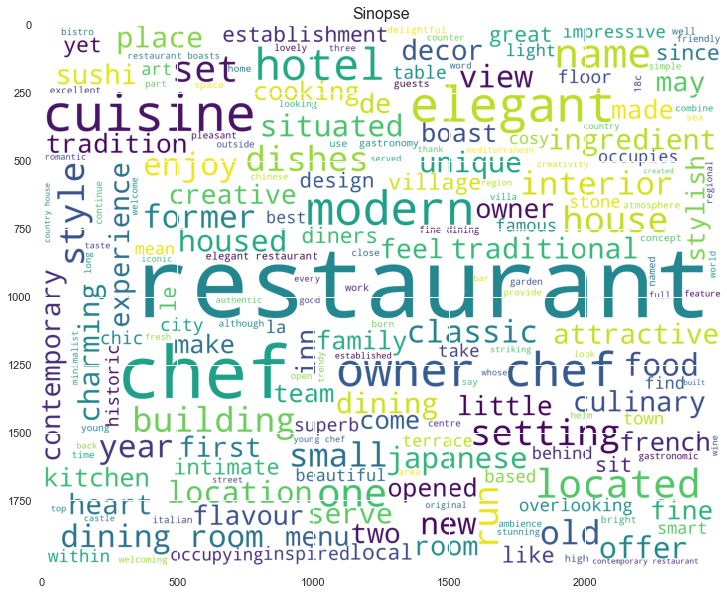

In [4]:
# Determinando o tamanho da imagem
plt.figure(figsize=(20,10))
# inserindo a coluna desejada
descricao = dados['blurb']

# Chamando a função. Este já faz a transfomação dos dados
## inserindo a variável com os dados escolhidos, o nome da cor e o nome para o título
wordcloud_text(descricao, 'white', 'Sinopse')

In [ ]:
# função para remover palavras irrelevantes do texto
def remove_stopwords(x):
    return [y for y in x if y not in stopwords.words('english')]

# transformando texto para criação do DataFrame
dados['blurb'] = dados['blurb'].apply(lambda text:str(text).split())
dados['blurb'] = dados['blurb'].apply(lambda x:remove_stopwords(x))

In [105]:
# criando uma tabela com as palavras mais usadas
top = Counter([item for sublist in dados['blurb'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Greens')

,Common_words,count
0,restaurant,610
1,chef,281
2,cuisine,146
3,elegant,122
4,dining,102
5,owner-chef,101
6,modern,95
7,located,85
8,-,79
9,hotel,72


## Conclusão
- Vejo que tenho muito o que aprender com a biblioteca do IpyWidgets, , já que ela trás mais praticidade, pois ela entrega opções de buscar por meio de filtragem as condições desejadas para os dados. 
- Por meio deste notebook, mostra-se a função de interação dinâmica ao gerar um mapa com filtros, onde pode-se buscar pelas opções os restaurantes que tem 3 estrelas ou não. Venho através deste, mostrar meu interesse e de me aprofundar mais na área de análise.  
- Agradeço por ter vindo até aqui!:)